In [24]:
#importing the libraries
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [26]:
#grabbing CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0
# train_images


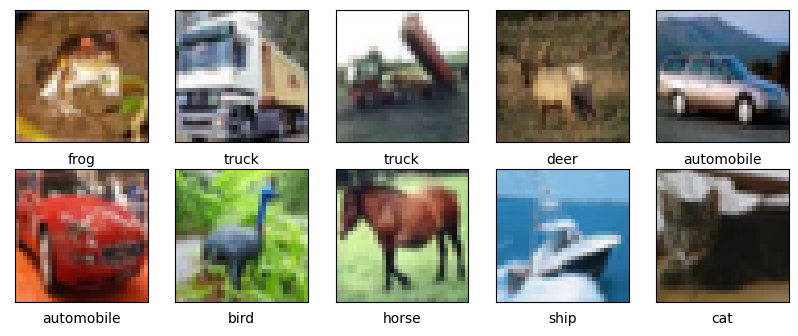

In [23]:
#showing images of mentioned categories
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
#     plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [21]:
#building CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [22]:
#model compilation
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
epochs = 10
h = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5331 - accuracy: 0.4415 - val_loss: 1.3205 - val_accuracy: 0.5244
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1785 - accuracy: 0.5834 - val_loss: 1.1208 - val_accuracy: 0.6021
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0230 - accuracy: 0.6405 - val_loss: 0.9886 - val_accuracy: 0.6550
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9169 - accuracy: 0.6781 - val_loss: 0.9569 - val_accuracy: 0.6699
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8469 - accuracy: 0.7058 - val_loss: 0.9008 - val_accuracy: 0.6893
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7861 - accuracy: 0.7249 - val_loss: 0.9112 - val_accuracy: 0.6882
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7332 - accuracy: 0.7427 - val_loss: 0.8724 -

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras import datasets  

model = keras.Sequential([
    keras.layers.Flatten(input_shape= (32,32,3)),
    keras.layers.Dense(128,activation = "relu"),
    keras.layers.Dense(64,activation = "relu"),
    keras.layers.Dense(32,activation = "relu"),
    keras.layers.Dense(10,activation="softmax")
])
model.summary()

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

history = model.fit(train_img,train_labels,validation_data=(test_img,test_labels),epochs = 11)

test_loss,test_acc = model.evaluate(test_img,test_labels)
print("loss %.3f"%test_loss)
print("acc %.3f"%test_acc)

predicted_values = model.predict(test_img)
predicted_values.shape

In [ ]:
n = random.randint(0,9999)
plt.figure(figsize=(10,10))
plt.imshow(test_img[n])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title(classnames[np.argmax(predicted_values[n])])